<a href="https://colab.research.google.com/github/HectorRAD/MachineLearning/blob/main/Solucion_Reto_SC_63_Hector_Alvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación inicial

In [757]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

data = pd.read_csv("/content/bank_marketing.csv", sep=',', header='infer')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


#Conclusiones de la informacion de las variables del data frame:


*   Hay un total de 17 variables, con 9000 registros cada una.
*   Hay 16 variables de entrada y una de salida (y).
*   No existe ninguna perdida datos, ya que todos las columnas cuentan con 9000 registros no nulos.
*   Variables Categoricas: Job, Marital, Education, Default, Housing, Loan, Contact, Month, POutcome, Y.
*   Variables Numericas: Age, Balance, Day, Duration, Campaign,PDays, Previous.
*   **Se realizara un análisis de calificacion, debido a que la variable de salida es categorica y la respuesta mas informativa es un si o no**




#Transformacion de categoricas a númericas

In [735]:
#Ordinal
le = LabelEncoder()
data['month'] = le.fit_transform(data['month'])

#Nominal
data = pd.get_dummies(data=data, columns=['job'], drop_first=True)
data = pd.get_dummies(data=data, columns=['marital'], drop_first=True)
data = pd.get_dummies(data=data, columns=['education'], drop_first=True)
data = pd.get_dummies(data=data, columns=['default'], drop_first=True)
data = pd.get_dummies(data=data, columns=['housing'], drop_first=True)
data = pd.get_dummies(data=data, columns=['loan'], drop_first=True)
data = pd.get_dummies(data=data, columns=['contact'], drop_first=True)
data = pd.get_dummies(data=data, columns=['poutcome'], drop_first=True)
data = pd.get_dummies(data=data, columns=['y'], drop_first=True)

#Salida
#data['y'] = data['y'].astype('category').cat.codes

data.head()


,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,31,2666,10,9,318,2,97,6,False,False,...,False,False,False,False,False,False,False,True,False,True
1,29,1584,6,11,245,1,-1,0,False,False,...,True,False,False,False,False,False,False,False,True,True
2,41,2152,17,9,369,1,-1,0,True,False,...,False,False,True,False,False,False,False,False,True,False
3,50,84,17,5,18,8,-1,0,True,False,...,False,False,True,False,False,False,False,False,True,False
4,40,0,28,5,496,2,182,11,False,False,...,False,False,False,False,False,False,False,True,False,True


#Justificacion del uso de OneHotEncoding

Ya que en este caso, las variables no tienen una relación jerarquica, definida en el problema, el diccionario del dataset o detectada por mi; es mejor utilizar OneHoteEncoding. **Es decir, son categoricas nominales**, no ordinales. Con exepcion de 'month'

LabelEncoder si define un orden natural dentro de las categorias, por lo que utilizarlo puede generar errores en los cuales una categoria es "mayor/mejor" que otra; como generar un sesgo por usuarios solteros, por ejemplo.

#Deteccion y transformacion de sesgos

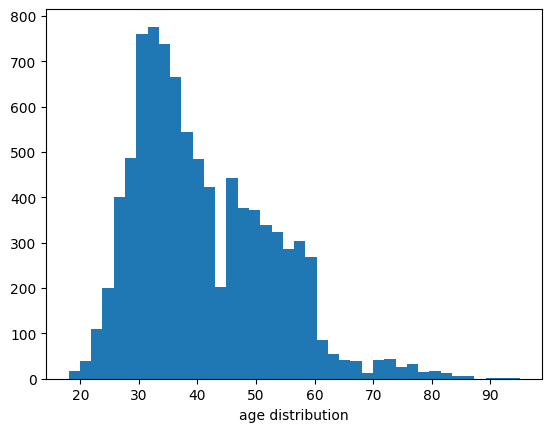

In [736]:
#Age Distribution ?? Age, Balance, Day, Duration, Campaign,PDays, Previous.
age_dist = np.array(data["age"])

ageplt = plt.hist(age_dist, bins=40)
ageplt = plt.xlabel("age distribution")



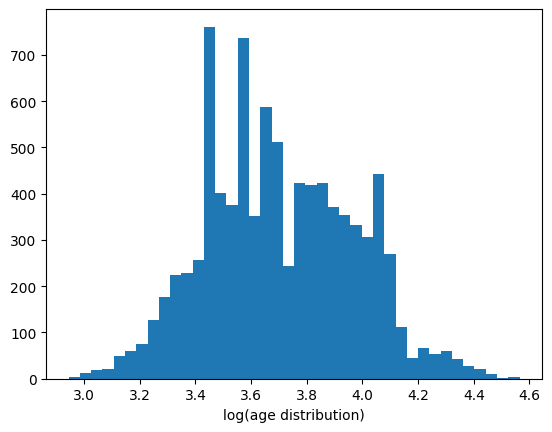

In [737]:
#Arreglando el ses izquierdo con transformacion logaritmica
def fun1(X):
  return np.log(X+1)

age_dist = fun1(age_dist)

ageplt = plt.hist(age_dist, bins=40)
ageplt = plt.xlabel("log(age distribution)")

plt.show()

data['age'] = age_dist

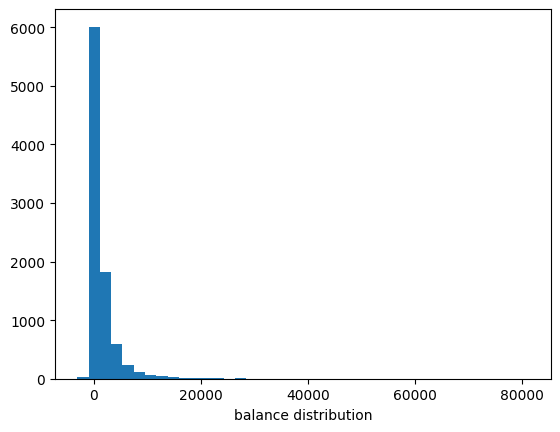

In [738]:
#balance Distribution
bal_dist = np.array(data["balance"])

balplt = plt.hist(bal_dist, bins=40)
balplt = plt.xlabel("balance distribution")


plt.show()

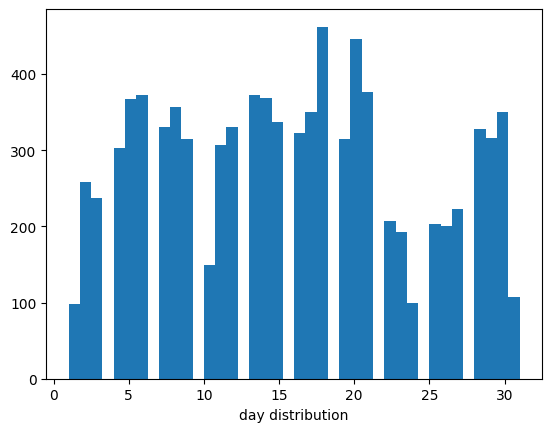

In [739]:
#day distribution
day_dist = np.array(data["day"])

dayplt = plt.hist(day_dist, bins=40)
dayplt = plt.xlabel("day distribution")

plt.show()

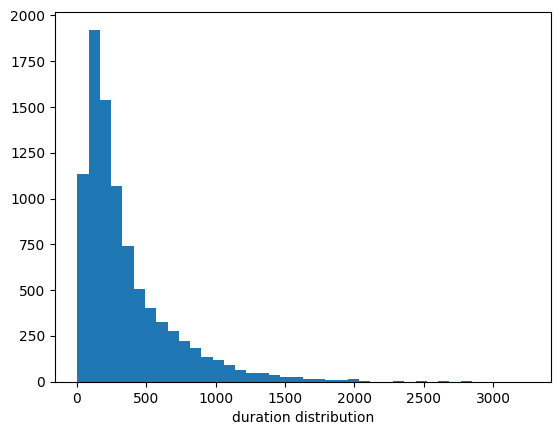

In [740]:
#duration distribution
dur_dist = np.array(data["duration"])

durplt = plt.hist(dur_dist, bins=40)
durplt = plt.xlabel("duration distribution")

plt.show()

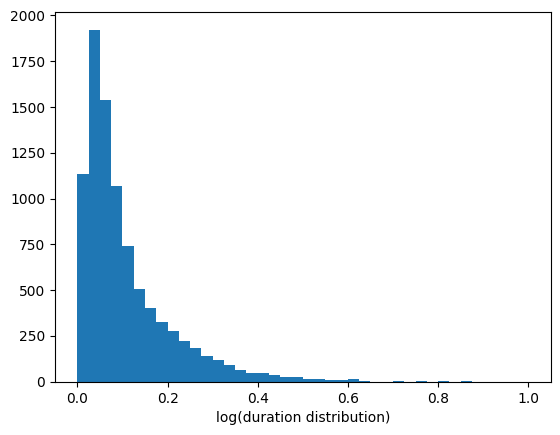

In [741]:
#sesgo duracion

def fun3(X):
  return (X - np.min(X)) / (np.max(X) - np.min(X))

dur_dist = fun3(dur_dist)
durplt = plt.hist(dur_dist, bins=40)
durplt = plt.xlabel("log(duration distribution)")

plt.show()

data['duration'] = dur_dist

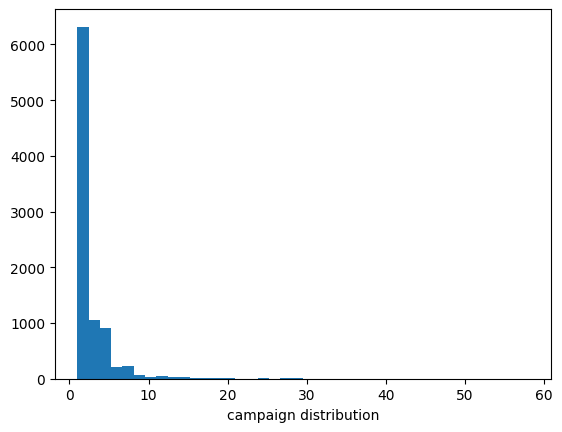

In [742]:
#campaing distribution
cam_dist = np.array(data["campaign"])

camplt = plt.hist(cam_dist, bins=40)
camplt = plt.xlabel("campaign distribution")

plt.show()

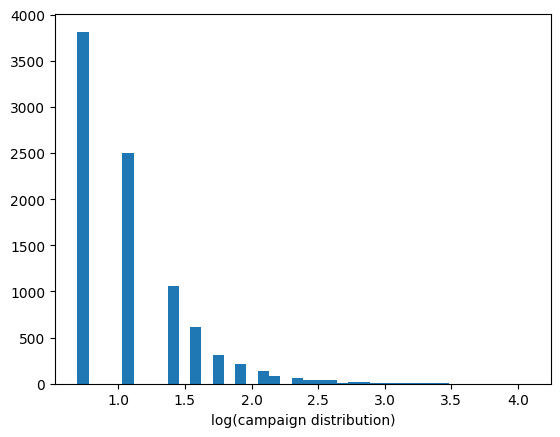

In [743]:
#Sesgo campaign

cam_dist = fun1(cam_dist)
camplt = plt.hist(cam_dist, bins=40)
camplt = plt.xlabel("log(campaign distribution)")

plt.show()

data['campaign'] = cam_dist

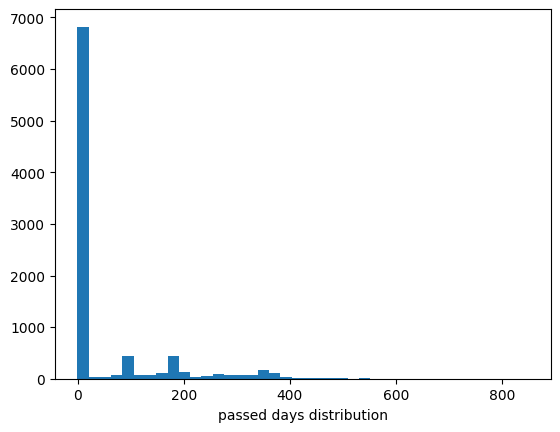

In [744]:
#passed days distribution
pd_dist = np.array(data["pdays"])

pdplt = plt.hist(pd_dist, bins=40)
pdplt = plt.xlabel("passed days distribution")


plt.show()

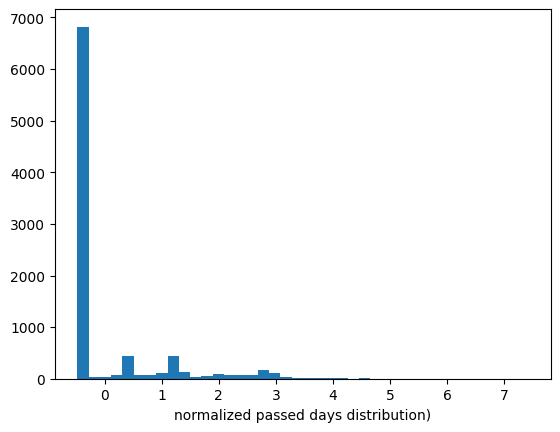

In [745]:
def fun2(X):
  return (X - np.mean(X)) / np.std(X)

pd_dist = fun2(pd_dist)
pdplt = plt.hist(pd_dist, bins=40)
pdplt = plt.xlabel("normalized passed days distribution)")

plt.show()

data['pdays'] = pd_dist

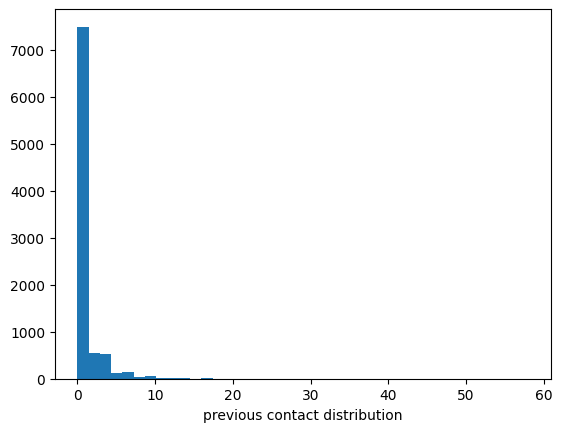

In [746]:
#previous distribution
pre_dist = np.array(data["previous"])

preplt = plt.hist(pre_dist, bins=40)
preplt = plt.xlabel("previous contact distribution")

plt.show()

#Conjunto de entrenamiento, validacion y prueba


In [747]:
#print(data.columns)
X = data[['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']]
Y = data[['y_yes']]
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, train_size=.60)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, train_size=.50)

#Regresion Logistica



In [755]:
clf = LogisticRegression(C = 1.0, solver = 'newton-cg')
LR_model = clf.fit(X_train, Y_train)

pr = LR_model.predict(X_val)

print('ACC:' + str(LR_model.score(X_val, Y_val)))

##############

confusion_matrix(Y_val,pr)

clf = LogisticRegression(C = 120, solver = 'newton-cg', max_iter=3000, penalty='l2')
LR_model = clf.fit(X_train, Y_train)

pr = LR_model.predict(X_val)

print('New ACC:' + str(LR_model.score(X_val, Y_val)))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ACC:0.8066666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


New ACC:0.81


#Red Neuronal

In [752]:
NNModel = MLPClassifier(solver ='adam', hidden_layer_sizes = (9,18), activation = 'logistic', batch_size = 100, learning_rate = 'constant',
learning_rate_init = 1e-3, max_iter = 1000)

NNModel.fit(X_train, np.ravel(Y_train))
print('ACC: '  + str(NNModel.score(X_val, Y_val)))

####################################33

NNModel = MLPClassifier(solver ='adam', hidden_layer_sizes = (20,30), activation = 'logistic', batch_size = 150, learning_rate = 'constant',
learning_rate_init = 1e-3, max_iter = 2000)

NNModel.fit(X_train, np.ravel(Y_train))
NNModel.score(X_val, Y_val)

print('NEW ACC: '  + str(NNModel.score(X_val, Y_val)))

ACC: 0.7183333333333334
NEW ACC: 0.77


#Seleccion del mejor modelo

In [763]:
parameters = {'C': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], 'penalty':('l2','none'), 'solver':('newton-cg','saga')}

RL_grid = LogisticRegression(max_iter=9000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(X_train, np.ravel(Y_train))

print(modelo_RL_grid)

print('Mejores parametros: %s Mejor Score: %0.2f' %(modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))


GridSearchCV(estimator=LogisticRegression(max_iter=9000),
             param_grid={'C': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
                         'penalty': ('l2', 'none'),
                         'solver': ('newton-cg', 'saga')})
Mejores parametros: {'C': 4.0, 'penalty': 'l2', 'solver': 'newton-cg'} Mejor Score: 0.80


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

In [764]:
clf = LogisticRegression(C = 4.0, solver = 'newton-cg', penalty='l2')
LR_model = clf.fit(X_train, np.ravel(Y_train))

pr = LR_model.predict(X_val)

print('ACC:' + str(LR_model.score(X_val, Y_val)))

ACC:0.8105555555555556


#Conclusiones

En esta ocasion, el resultado mas accurate fue dado por el modelo de regresion linear. Especificamente con los parametros {'C': 4.0, 'penalty': 'l2', 'solver': 'newton-cg'}.

Creo que en esta ocasion, la regresion linear fue mejor por que hay multiples variables con alta dimensionalidad y se trata de u ndata set pequeño. Además de que al tratarse de un dataset con alta interpetacion, es mejor usar la regresion linear.

Finalmente, creo que el aprendizaje computacional es bueno en la mercadotecnia por que es un rubro con muchos dato historicos, lo cual permite generar modelos facilmente, los cuales ayudan a crear campañas mucho mas certeras y asi reducir el riesgo de fallo y reducir costos en campañas pocos efectivas.


